# Exploration des données - EDA (Exploratory Data Analysis)

## Imports et récupération des données

In [43]:
# Default
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import plotly.express as px
import time

# Anova et chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import chi2_contingency

# désactiver temporairement les avertissements
warnings.filterwarnings('ignore')

In [44]:
file_path = "https://raw.githubusercontent.com/remijul/dataset/master/Airline%20Passenger%20Satisfaction.csv"
df = pd.read_csv(file_path, sep=";", index_col=False)
df = df.drop('id', axis=1)

### Déclaration des fonctions

In [45]:
def correlation(dataframe, method):
  liste = []
  corr = dataframe.corr(method = method)
  colonnesIndex = corr.index
  colonnesNoms = corr.columns
  for colonne in colonnesIndex:
    for colonne2 in colonnesNoms:
      if colonne != colonne2:
        trie = [colonne, colonne2]
        trie.sort()
        liste.append([trie[0], trie[1], corr.loc[colonne, colonne2]])
  return pd.DataFrame(liste, columns=["col1", "col2", "values"]).drop_duplicates(["col1", "col2"])

def tauxDeRemplissage(df):
  return (df.notna().sum()*100/len(df)).sort_values()

### Dataframe de base

In [46]:
df

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


### Changement des noms de colonne

In [47]:
df.columns = ['Satisfaction', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
                    'Class', 'Flight_Distance', 'Seat_comfort', 'Departure_Arrival_time_convenient', 
                    'Food_and_drink', 'Gate_location', 'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support', 
                    'Ease_of_Online_booking', 'On_board_service', 'Leg_room_service', 'Baggage_handling',
                    'Checkin_service', 'Cleanliness', 'Online_boarding', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

## Etude technique du dataframe

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer_Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight_Distance                    129880 non-null  int64  
 7   Seat_comfort                       129880 non-null  int64  
 8   Departure_Arrival_time_convenient  129880 non-null  int64  
 9   Food_and_drink                     129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Inflight_wifi_service              1298

In [49]:
df.nunique()

Satisfaction                            2
Gender                                  2
Customer_Type                           2
Age                                    75
Type_of_Travel                          2
Class                                   3
Flight_Distance                      5398
Seat_comfort                            6
Departure_Arrival_time_convenient       6
Food_and_drink                          6
Gate_location                           6
Inflight_wifi_service                   6
Inflight_entertainment                  6
Online_support                          6
Ease_of_Online_booking                  6
On_board_service                        6
Leg_room_service                        6
Baggage_handling                        5
Checkin_service                         6
Cleanliness                             6
Online_boarding                         6
Departure_Delay_in_Minutes            466
Arrival_Delay_in_Minutes              472
dtype: int64

In [50]:
df.describe()

,Age,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [51]:
tauxDeRemplissage(df)

Arrival_Delay_in_Minutes              99.697413
Online_boarding                      100.000000
Cleanliness                          100.000000
Checkin_service                      100.000000
Baggage_handling                     100.000000
Leg_room_service                     100.000000
On_board_service                     100.000000
Ease_of_Online_booking               100.000000
Online_support                       100.000000
Inflight_entertainment               100.000000
Departure_Delay_in_Minutes           100.000000
Satisfaction                         100.000000
Food_and_drink                       100.000000
Departure_Arrival_time_convenient    100.000000
Seat_comfort                         100.000000
Flight_Distance                      100.000000
Class                                100.000000
Type_of_Travel                       100.000000
Age                                  100.000000
Customer_Type                        100.000000
Gender                               100

## Matrices de corrélation
*compare des features numériques entre elles*

In [52]:
df_pour_correlation = df.copy()

colonnes_num = list(df_pour_correlation.select_dtypes(include=['int', 'float']).columns)
colonnes_cat = list(df_pour_correlation.select_dtypes(include=['object']).columns)

print(f'Colonnes numériques : {colonnes_num}')
print(f'Colonnes catégorielles : {colonnes_cat}')

print(f'\nPossibilités dans les colonnes catégorielles : \n')
for nom_colonne in colonnes_cat:
    print(f'{nom_colonne} : {df_pour_correlation[nom_colonne].unique()}')
    print('-------------------')

df_pour_correlation['Gender'] = df_pour_correlation['Gender'].replace({'Female': 1, 'Male': 0})
df_pour_correlation['Satisfaction'] = df_pour_correlation['Satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})
df_pour_correlation['Customer_Type'] = df_pour_correlation['Customer_Type'].replace({'Loyal Customer': 1, 'disloyal Customer': 0})
df_pour_correlation['Type_of_Travel'] = df_pour_correlation['Type_of_Travel'].replace({'Personal Travel': 1, 'Business travel': 0})
df_pour_correlation['Class'] = df_pour_correlation['Class'].replace({'Business': 2, 'Eco Plus': 1, 'Eco': 0})
df_pour_correlation


Colonnes numériques : ['Age', 'Flight_Distance', 'Seat_comfort', 'Departure_Arrival_time_convenient', 'Food_and_drink', 'Gate_location', 'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking', 'On_board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']
Colonnes catégorielles : ['Satisfaction', 'Gender', 'Customer_Type', 'Type_of_Travel', 'Class']

Possibilités dans les colonnes catégorielles : 

Satisfaction : ['satisfied' 'neutral or dissatisfied']
-------------------
Gender : ['Female' 'Male']
-------------------
Customer_Type : ['Loyal Customer' 'disloyal Customer']
-------------------
Type_of_Travel : ['Personal Travel' 'Business travel']
-------------------
Class : ['Eco' 'Business' 'Eco Plus']
-------------------


,Satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,1,1,65,1,0,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,1,47,1,2,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,1,1,15,1,0,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,1,1,60,1,0,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,1,1,70,1,0,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,0,29,1,0,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,0,0,63,1,2,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,0,0,69,1,0,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,0,0,66,1,0,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


<Axes: >

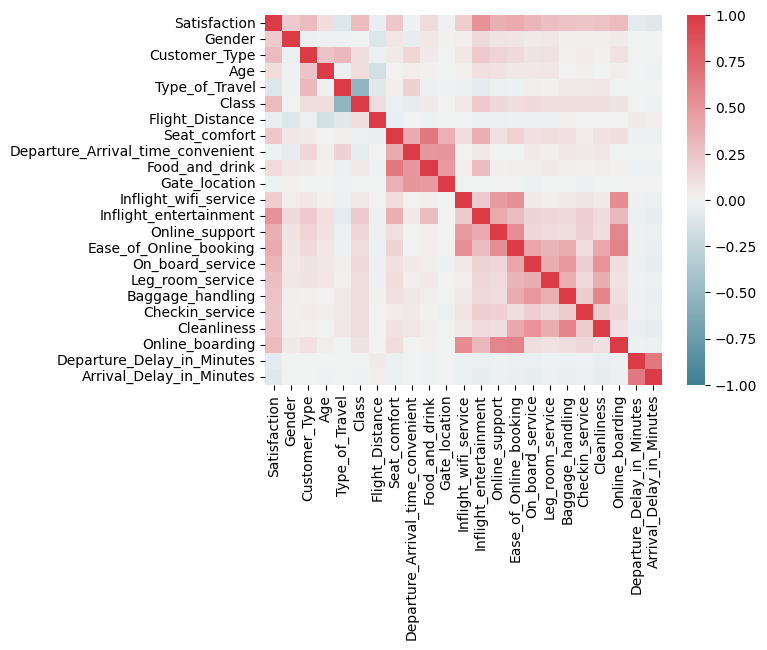

In [53]:
corr_matrix = df_pour_correlation.corr(method='kendall')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, vmin=-1, vmax=1)

Etude de la heatmap
- forte relation entre le retard à l'arrivée et le retard au départ => normal je dirais !
- forte relation entre la qualité de la nourriture et la qualité de la place => explique probablement la différence des classes

In [54]:
corr_matrix_2by2 = correlation(df_pour_correlation, "kendall")
corr_matrix_2by2 = corr_matrix_2by2.sort_values('values', ascending=False)

# Features avec une forte corrélation
df_style = corr_matrix_2by2.loc[corr_matrix_2by2['values'] > 0.5].style
display(df_style)

,col1,col2,values
483,Arrival_Delay_in_Minutes,Departure_Delay_in_Minutes,0.657873
162,Food_and_drink,Seat_comfort,0.655096
327,Ease_of_Online_booking,Online_boarding,0.601894
392,Baggage_handling,Cleanliness,0.586595
305,Online_boarding,Online_support,0.585014
261,Inflight_wifi_service,Online_boarding,0.559782
299,Ease_of_Online_booking,Online_support,0.543543
255,Ease_of_Online_booking,Inflight_wifi_service,0.524836
11,Inflight_entertainment,Satisfaction,0.519570
348,Cleanliness,On_board_service,0.514360


In [55]:
# Features avec une corrélation inverse
df_style = corr_matrix_2by2.loc[corr_matrix_2by2['values'] < -0.1].style
display(df_style)

,col1,col2,values
27,Flight_Distance,Gender,-0.101623
3,Satisfaction,Type_of_Travel,-0.109239
71,Age,Flight_Distance,-0.165961
92,Class,Type_of_Travel,-0.530874


In [56]:
# Corrélations avec la feature satisfaction
df_style = corr_matrix_2by2.loc[(corr_matrix_2by2['col1'] == 'Satisfaction') | (corr_matrix_2by2['col2'] == 'Satisfaction')].style
display(df_style)

,col1,col2,values
11,Inflight_entertainment,Satisfaction,0.519570
13,Ease_of_Online_booking,Satisfaction,0.387335
12,Online_support,Satisfaction,0.363629
14,On_board_service,Satisfaction,0.322337
19,Online_boarding,Satisfaction,0.299704
4,Class,Satisfaction,0.297445
1,Customer_Type,Satisfaction,0.292592
15,Leg_room_service,Satisfaction,0.278201
16,Baggage_handling,Satisfaction,0.262040
18,Cleanliness,Satisfaction,0.259264


Conclusion
- nécéssitant la transformation de certaines données de façon artificielle on peux douter de l'exactitude mathématique des corrélations. Cependant les résultats obtenus n'ont pas l'air complétement abérrants avec la feature inflight_entertainment qui ressort beaucoup comme sur beaucoup d'autres projets du groupe.

## Test anova
*Compare une feature numérique rapport a des features catégorielles*

In [57]:
df_anova = df.copy()
df_anova['Satisfaction'] = df_anova['Satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})

#Gender + Customer_Type + Age + Type_of_Travel + Class + Flight_Distance + Seat_comfort + Departure_Arrival_time_convenient + 
#Food_and_drink + Gate_location + Inflight_wifi_service + Inflight_entertainment + Online_support + Ease_of_Online_booking + 
#On_board_service + Leg_room_service + Baggage_handling + Checkin_service + Cleanliness + Online_boarding + Departure_Delay_in_Minutes + Arrival_Delay_in_Minutes'

model = ols('Satisfaction ~ Gender + Customer_Type + Age + Type_of_Travel + Class + Flight_Distance + Seat_comfort + Departure_Arrival_time_convenient + Food_and_drink + Gate_location + Inflight_wifi_service + Inflight_entertainment + Online_support + Ease_of_Online_booking + On_board_service + Leg_room_service + Baggage_handling + Checkin_service + Cleanliness + Online_boarding + Departure_Delay_in_Minutes + Arrival_Delay_in_Minutes', data=df_anova)
entrainement = model.fit()
anova_lm(entrainement)

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,1442.520571,1442.520571,11290.529318,0.000000e+00
Customer_Type,1.0,2872.588476,2872.588476,22483.592295,0.000000e+00
Type_of_Travel,1.0,1405.791222,1405.791222,11003.050715,0.000000e+00
Class,2.0,1339.639443,669.819721,5242.642185,0.000000e+00
Age,1.0,0.169993,0.169993,1.330524,2.487142e-01
Flight_Distance,1.0,117.437766,117.437766,919.178945,3.383450e-201
Seat_comfort,1.0,1590.744659,1590.744659,12450.671114,0.000000e+00
Departure_Arrival_time_convenient,1.0,704.072128,704.072128,5510.733893,0.000000e+00
Food_and_drink,1.0,145.686094,145.686094,1140.277057,7.096017e-249
Gate_location,1.0,43.357530,43.357530,339.357009,1.101243e-75


Conclusion
- l'anova nous permet de comparer une feature numériques avec des features catégorielles
- pour l'exploiter il faut que PR(>F) soit inférieur à 5% (0.05) pour que la donnée explique la feature numérique de référence
- à l'inverse si la données est supérieur à 5% (0.05) elle peux être écartée de la justification
- ici la plupart des features sont proche de zéro donc elles participent à l'explication de la Satisfaction
- en revanche la feature age qui est à 0.24 soit 24% peut être écartée des features qui expliquerais la satisfaction 

## Test chi2
*Permet d'expliquer des features catégorielles entre elles*

In [58]:
chi2 = df.copy()

In [59]:
#chi2.groupby(by=["Satisfaction", "Class"]).count()

st_chi2, st_p, st_dof, st_exp  = chi2_contingency(chi2[["Satisfaction", "Class"]].pivot_table(index="Satisfaction", columns="Class", aggfunc=len))

if st_p > 0.05:
  print("La satisfaction ou non n'a rien à voir avec la classe")
elif st_p < 0.05:
  print("La classe a un lien avec la satisfaction")

print(f"La p-value vaut {st_p}")

La classe a un lien avec la satisfaction
La p-value vaut 0.0


In [60]:
#chi2.groupby(by=["Satisfaction", "Gender"]).count()

st_chi2, st_p, st_dof, st_exp  = chi2_contingency(chi2[["Satisfaction", "Gender"]].pivot_table(index="Satisfaction", columns="Gender", aggfunc=len))

if st_p > 0.05:
  print("La satisfaction ou non n'a rien à voir avec le genre")
elif st_p < 0.05:
  print("Le genre a un lien avec la satisfaction")

print(f"La p-value vaut {st_p}")

Le genre a un lien avec la satisfaction
La p-value vaut 0.0


In [61]:
#chi2.groupby(by=["Satisfaction", "Customer Type"]).count()

st_chi2, st_p, st_dof, st_exp  = chi2_contingency(chi2[["Satisfaction", "Customer_Type"]].pivot_table(index="Satisfaction", columns="Customer_Type", aggfunc=len))

if st_p > 0.05:
  print("La satisfaction ou non n'a rien à voir avec le Customer Type")
elif st_p < 0.05:
  print("Le Customer Type a un lien avec la satisfaction")

print(f"La p-value vaut {st_p}")

Le Customer Type a un lien avec la satisfaction
La p-value vaut 0.0
